<a href="https://colab.research.google.com/github/SubbulakshmiSN/Industrial_Cooper_Modeling-/blob/main/icm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`INDUSTRY COOPER MODELING`***





# *`IMPORTING LIBRARIES`*

In [478]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#data pre-processing
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

#statistics
from scipy.stats import skew, boxcox

#Supress Warnings

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#Machine Learning Training
from sklearn.model_selection import train_test_split

#Machine Learning Evaluation Metrics
from sklearn.metrics import  precision_score, recall_score, classification_report, accuracy_score,confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_auc_score
import joblib

# *`READ THE DATA`*

In [479]:
df=pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv",on_bad_lines='warn')
df.head()

<ipython-input-479-4eee48cbc279>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv",on_bad_lines='warn')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## *`DATA OBSERVATION`*

In [480]:
df.shape

(181673, 14)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [482]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [483]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [484]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [485]:
'''
categorical columns= status,item_type,application,delivery date
Target for classifier= status
Target for regressor= selling price
'''

'\ncategorical columns= status,item_type,application,delivery date\nTarget for classifier= status\nTarget for regressor= selling price\n'

In [486]:
col=['status','country','item type','application','delivery date']
for i in col:
  print(i,":")
  print(df[i].unique())
  print("-----------------------")

status :
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
-----------------------
country :
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.  nan]
-----------------------
item type :
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
-----------------------
application :
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68. nan]
-----------------------
delivery date :
[20210701. 20210401. 20210101. 20210301. 20210601. 20210501. 20210801.
 30310101. 20210901. 20211001. 20211101. 20220101. 20200701. 20201001.
 20200101. 20210201. 20211201. 20190701. 20200801. 20201101. 20201201.
 20190401. 20200601. 20200401. 20200901. 20200501.       nan 20212222.
 20191001.]
-----------------------


## *`DATA HANDLING`*

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [488]:
#converting data types of some columns
df["quantity tons"]=pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date"]=pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery date"]=pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [489]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [490]:
#material_ref have more nulls
print("before",np.round(df['material_ref'].isnull().mean()*100,2),"% missing values")

before 42.89 % missing values


In [491]:
#trying to clean material_ref
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [492]:
print("after",np.round(df['material_ref'].isnull().mean()*100,2),"% missing values")

after 55.4 % missing values


In [493]:
#dropping columns material_ref as it has more nulls and id as it is unique
df.drop(columns=["material_ref","id"],inplace=True)

In [494]:
df.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [495]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [496]:
#quantity and selling price goes negative its not possible so changing them a null
df["quantity tons"]=df["quantity tons"].apply(lambda x: np.nan if x <=0 else x)
df["selling_price"]=df["selling_price"].apply(lambda x: np.nan if x <=0 else x)
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816650e+05
mean,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918124e+03
std,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.318020e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [497]:
#handling nulls using median and mode

category_cols=["delivery date","status","item_date"]
continuous_cols=["quantity tons","application","thickness","selling_price","customer","country"]

for col in category_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

for col in continuous_cols:
  df[col]=df[col].fillna(df[col].median())

df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [498]:
for col in ["item type","status"]:
    print(col,":")
    print(df[col].value_counts())
    print("----"*20)

item type :
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
--------------------------------------------------------------------------------
status :
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
--------------------------------------------------------------------------------


## *`SKEWNESS OF THE DATA`*

In [499]:
#skew handling

def skewness(df,*column):
    number_row=len(column)
    plot_no=0

    for col_name in column:
        if "log" in col_name or "sqrt" in col_name or "boxcox" in col_name:
            title= 'After Transformation'
        else:
            title= 'Before Transformation'

        plt.figure(figsize=(18,18))

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.boxplot(x=col_name, data=df, color="orange")
        plt.title('Boxplot-'+title)

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.histplot(df[col_name], kde=True, bins=30, color="red")
        plt.title(f'Distplot- skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.violinplot(x=col_name, data=df, color="green")
        plt.title("violinplot-"+title)

    plt.tight_layout()
    return plt.show()


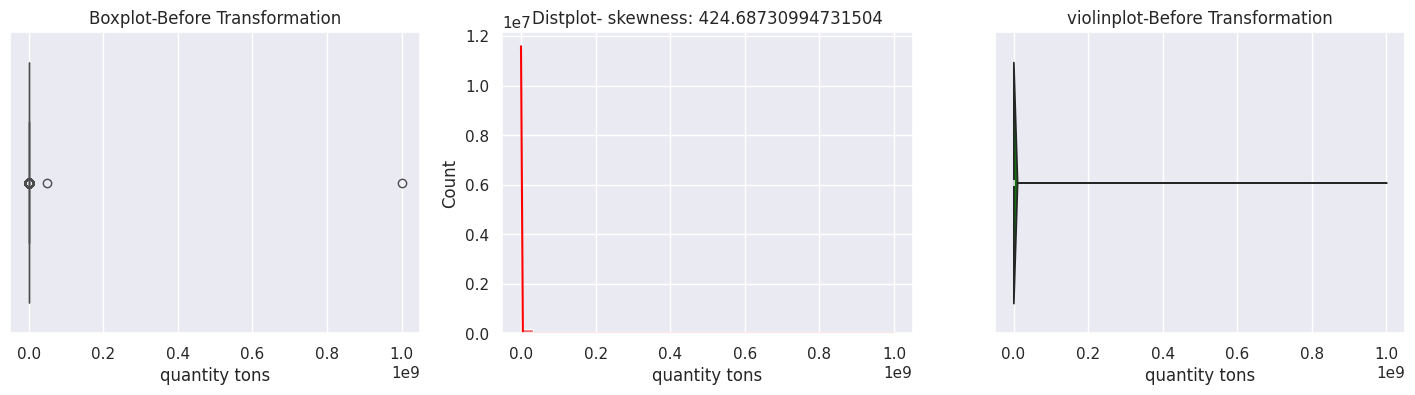

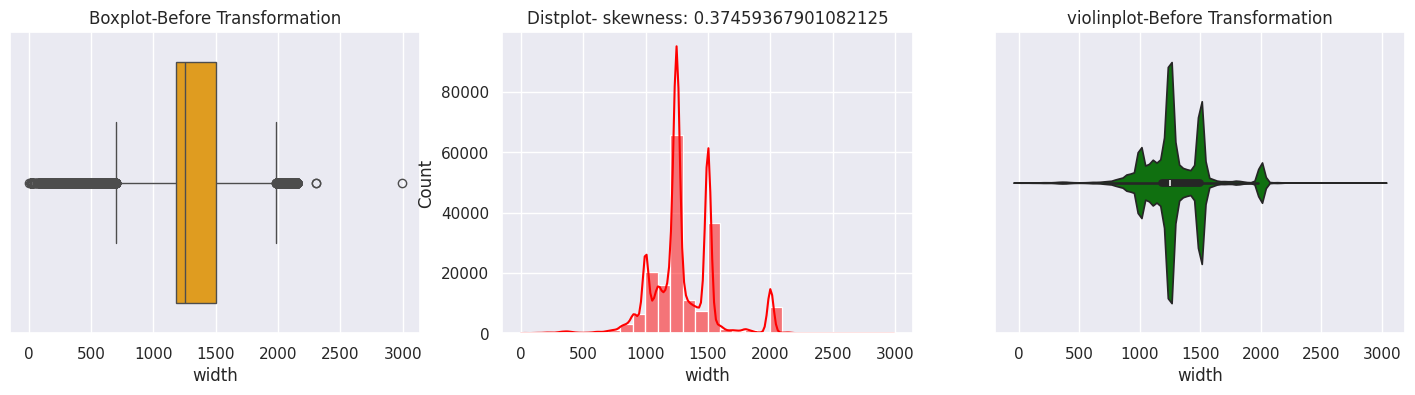

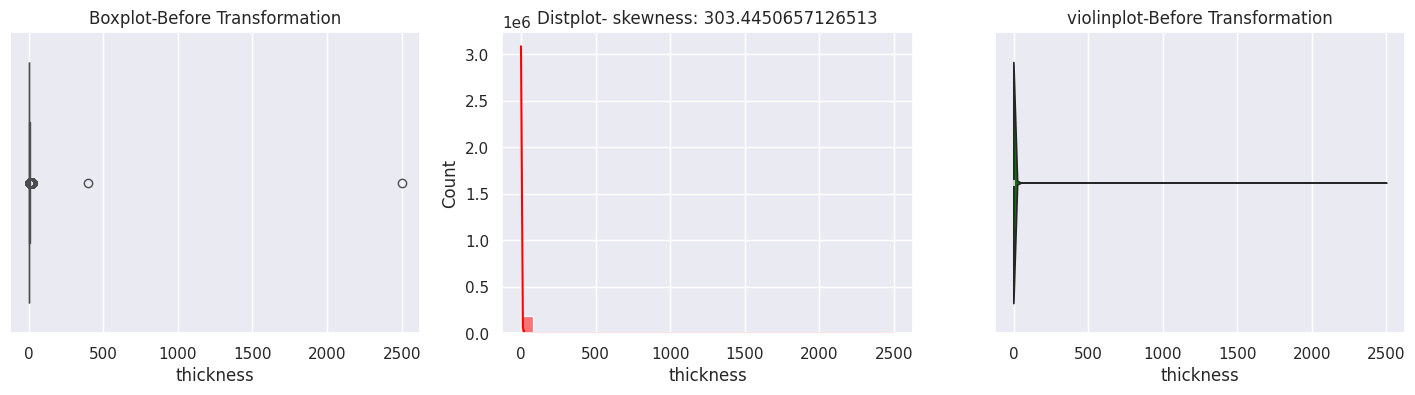

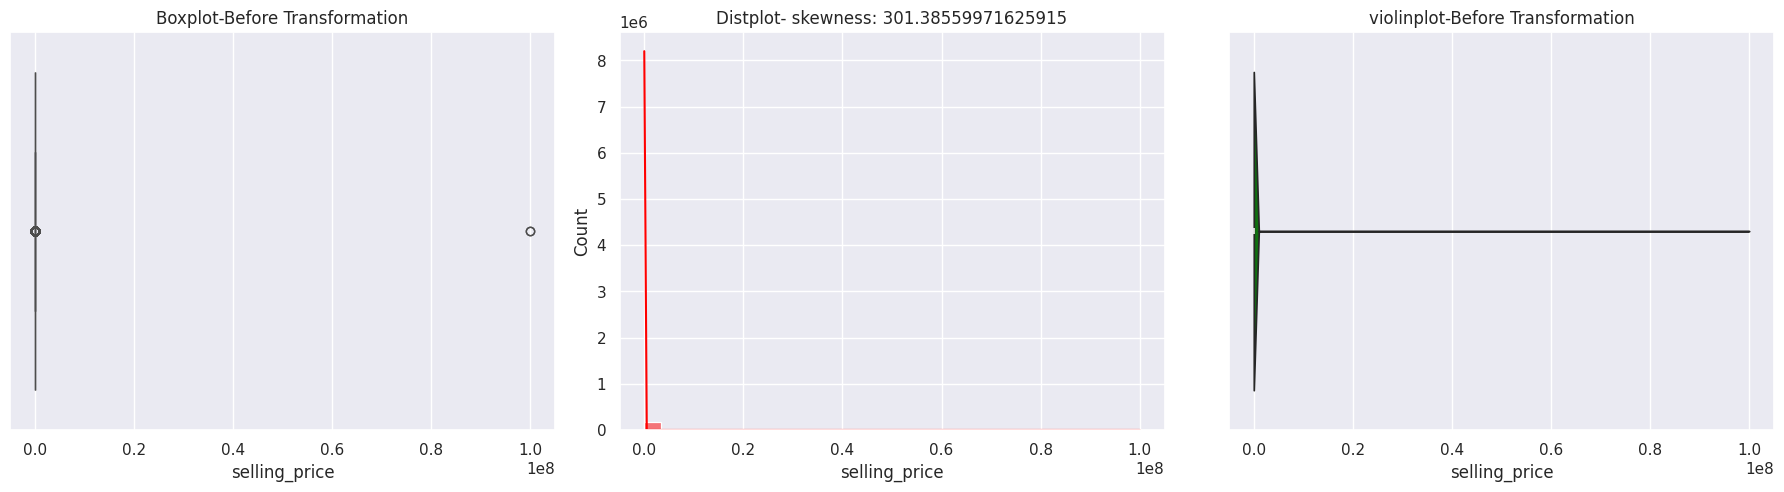

In [500]:
#specifying numerical cols
continuous_cols=["quantity tons","width","thickness","selling_price"]
skew_plot=skewness(df,*continuous_cols)
skew_plot


In [501]:
#quantity tons,thickness and selling price are right skewed, using log transformation

def log_transformation(df,*column):
    for col_name in column:
      df[col_name + '_log_skewed']=np.log1p(df[col_name])

    column=[i for i in df.columns if "log" in i]

    return skewness(df,*column)

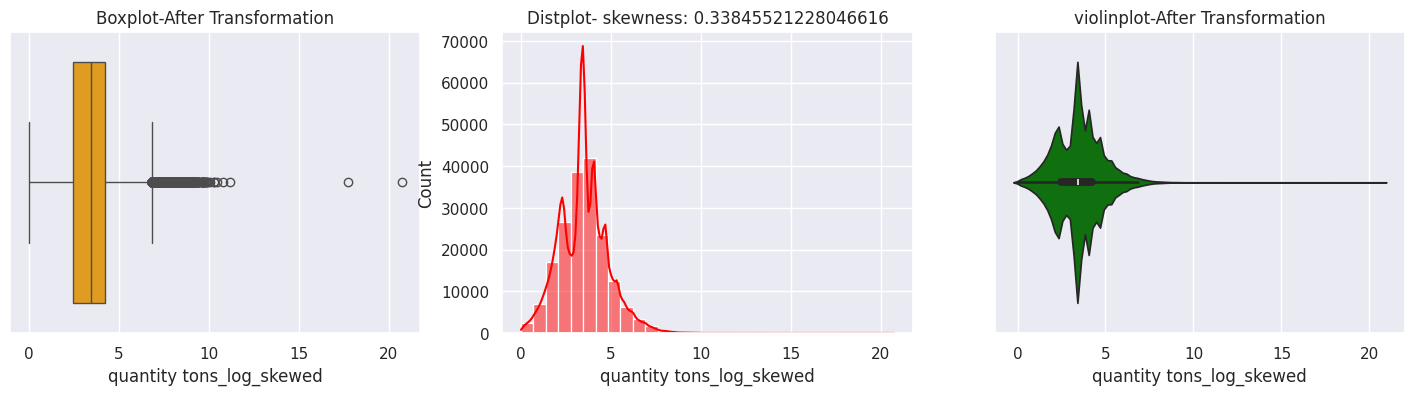

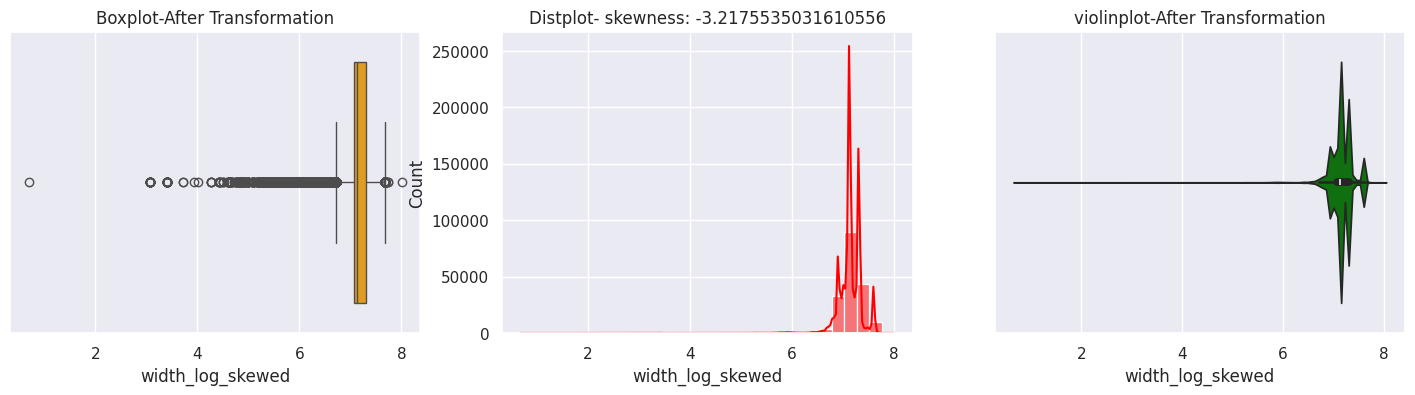

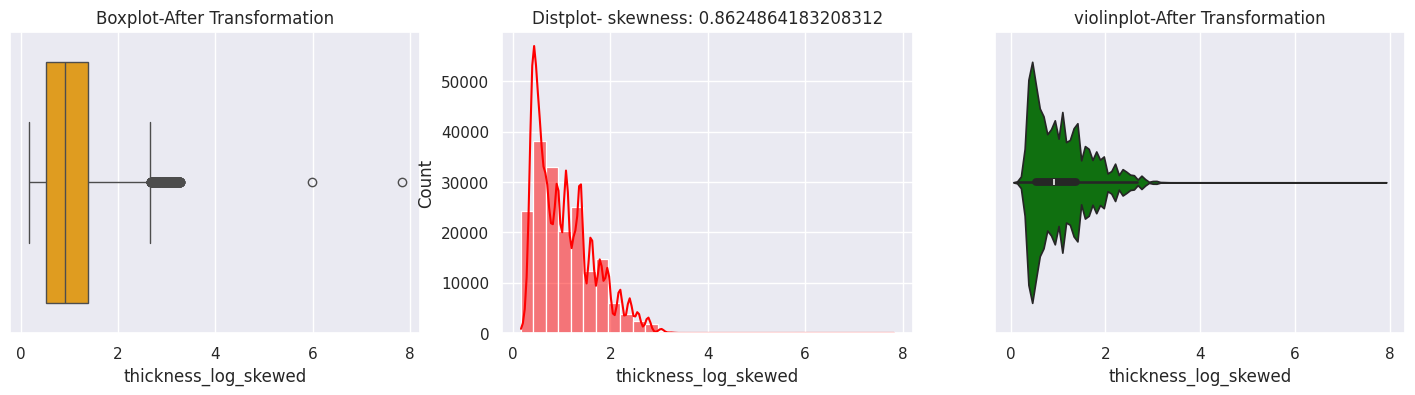

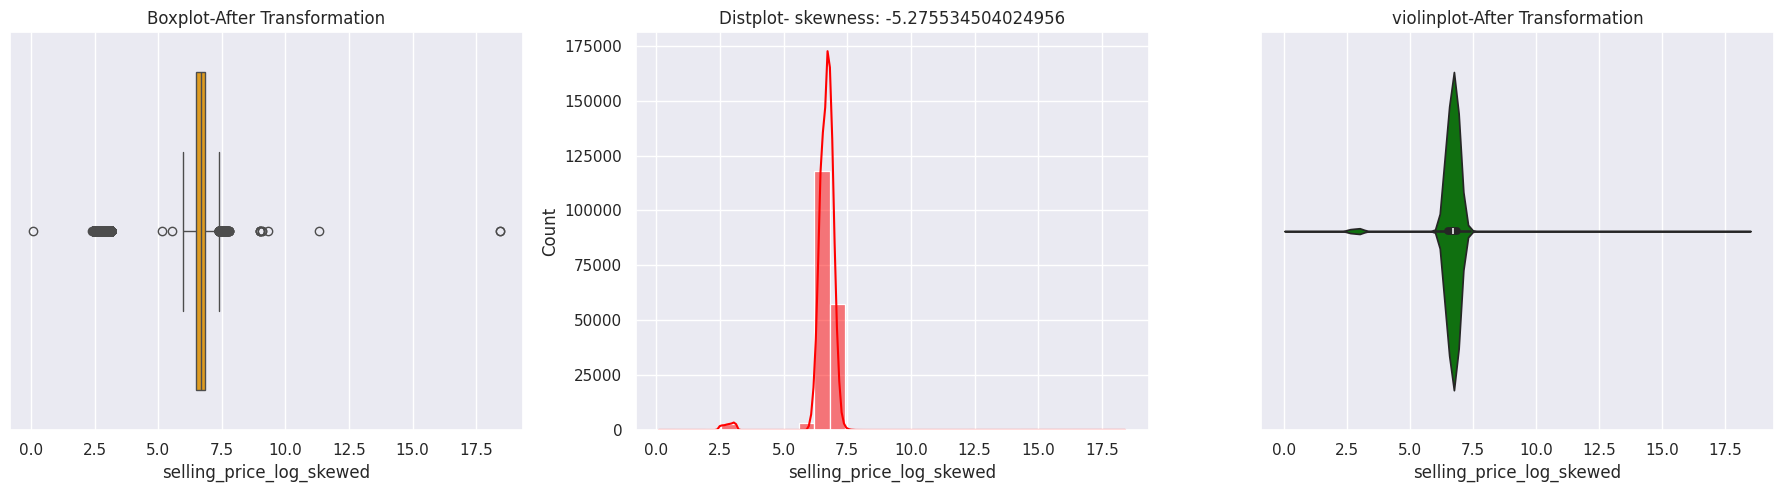

In [502]:
log_transformation(df,*continuous_cols)

## *`HANDLING OUTLIERS AND PREPROCESSING`*

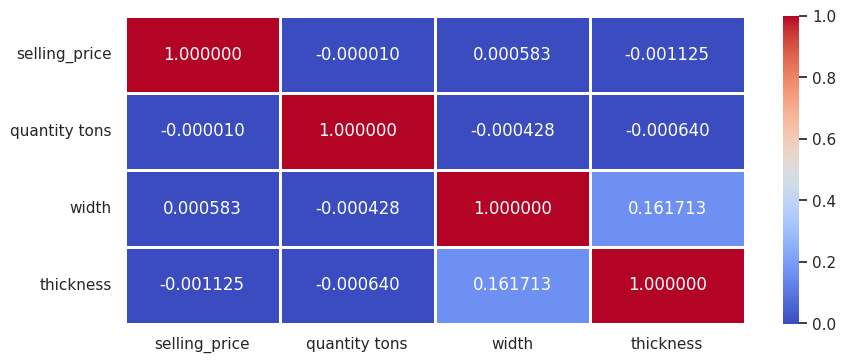

In [503]:
plt.figure(figsize=(10,4))
cols=['selling_price','quantity tons',"width","thickness"]
sns.heatmap(df[cols].corr(),annot=True,fmt='.6f',linewidths=2,cmap='coolwarm')
plt.show()

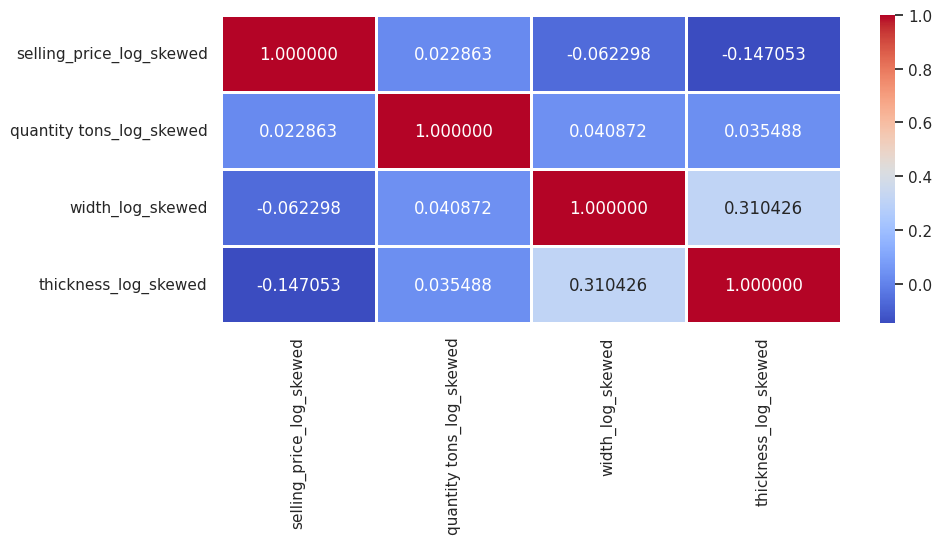

In [504]:
plt.figure(figsize=(10,4))
cols=['selling_price_log_skewed','quantity tons_log_skewed',"width_log_skewed","thickness_log_skewed"]
sns.heatmap(df[cols].corr(),annot=True,fmt='.6f',linewidths=2,cmap='coolwarm')
plt.show()

In [505]:
#handling outliers
df1=df.drop(columns=["width_log_skewed","thickness","quantity tons","selling_price"],axis=1)


In [506]:
df1.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,4.010077,1.098612,6.751101
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.645123,0.587787,6.954639
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-01-01,5.958755,0.322083,6.469762
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-01-01,5.315229,1.193922,6.645091
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,640665,2021-03-01,6.667626,1.609438,6.359574


In [507]:
df1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date',
       'quantity tons_log_skewed', 'thickness_log_skewed',
       'selling_price_log_skewed'],
      dtype='object')

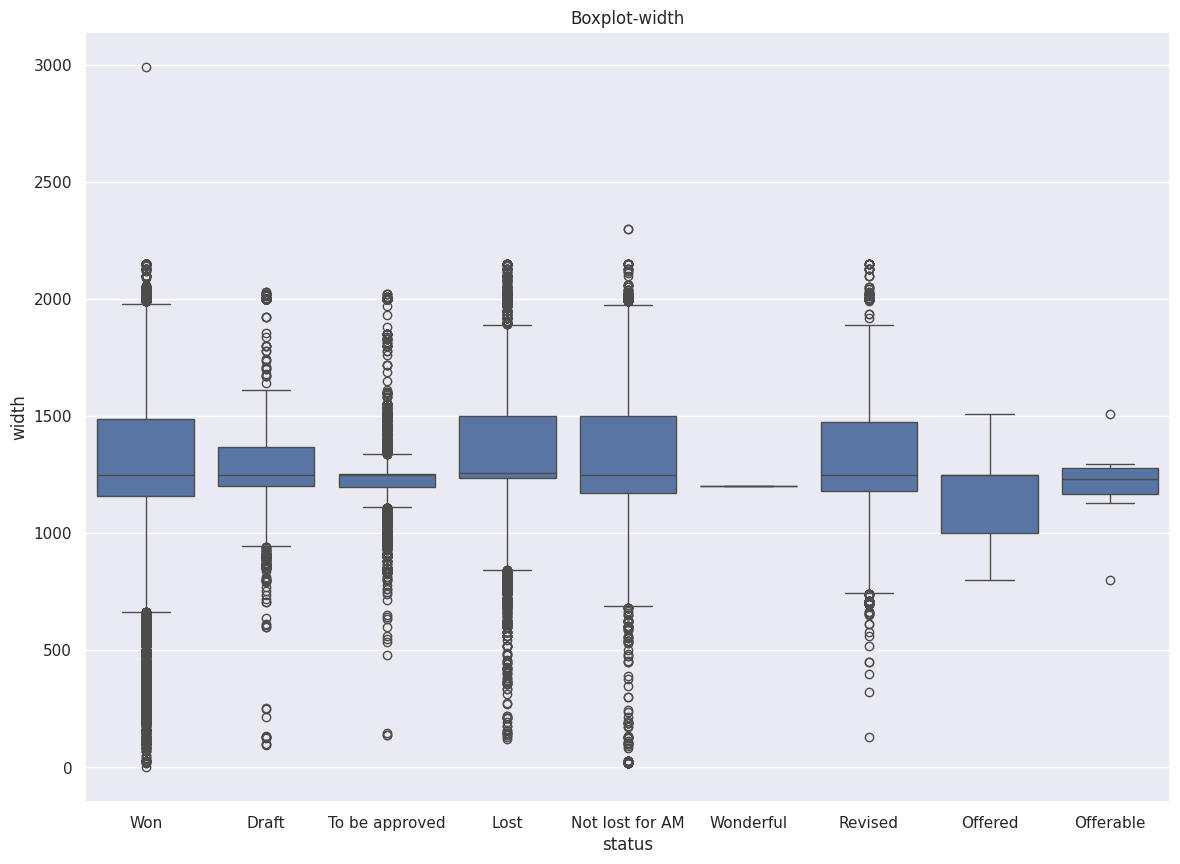

In [508]:
plt.figure(figsize=(14,10))
fig1=sns.boxplot(x='status',y='width', data=df1)
plt.title('Boxplot-width')
plt.show()


In [509]:
#sample outlier removal
q1=df1["width"].quantile(.25)
q3=df1["width"].quantile(.75)

iqr=q3-q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)
df1["width"]=df["width"].clip(lower_threshold,upper_threshold)

700.0
1980.0


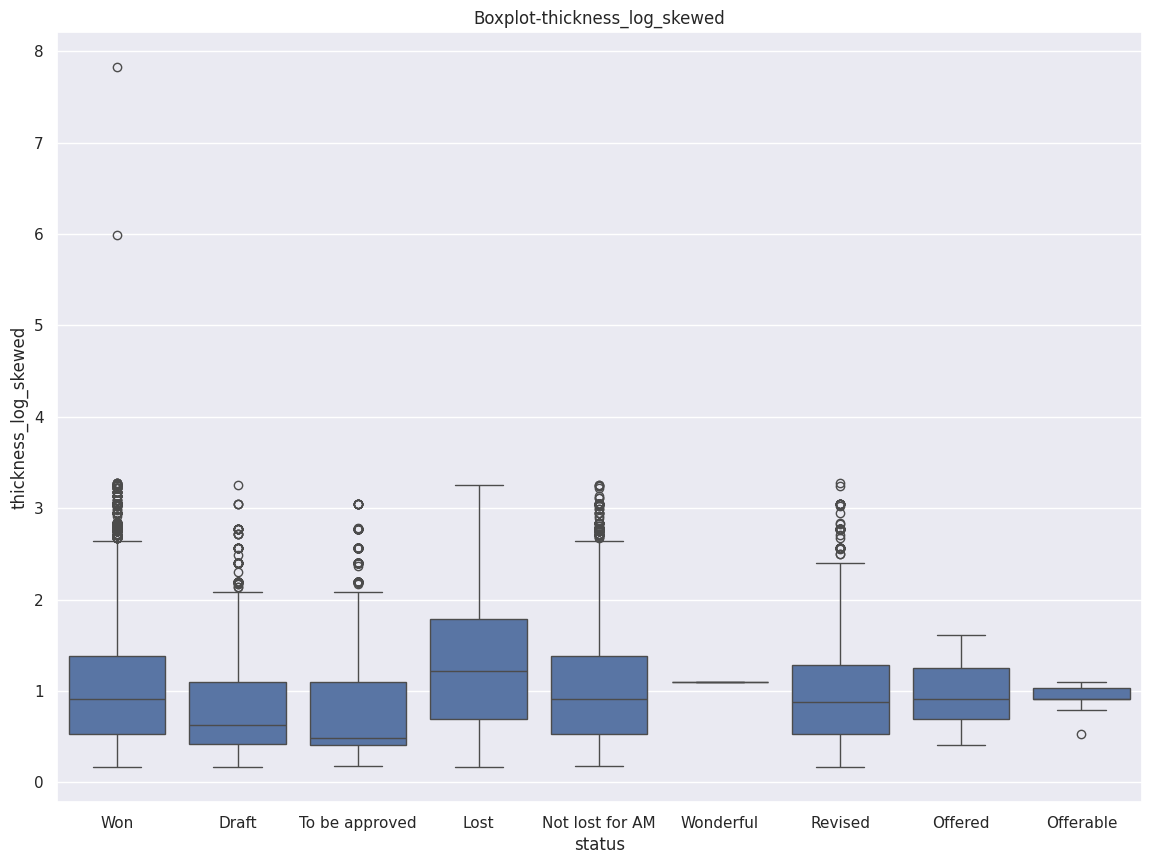

In [510]:
plt.figure(figsize=(14,10))
fig2=sns.boxplot(x="status",y='thickness_log_skewed', data=df1)
plt.title('Boxplot-thickness_log_skewed')
plt.show()

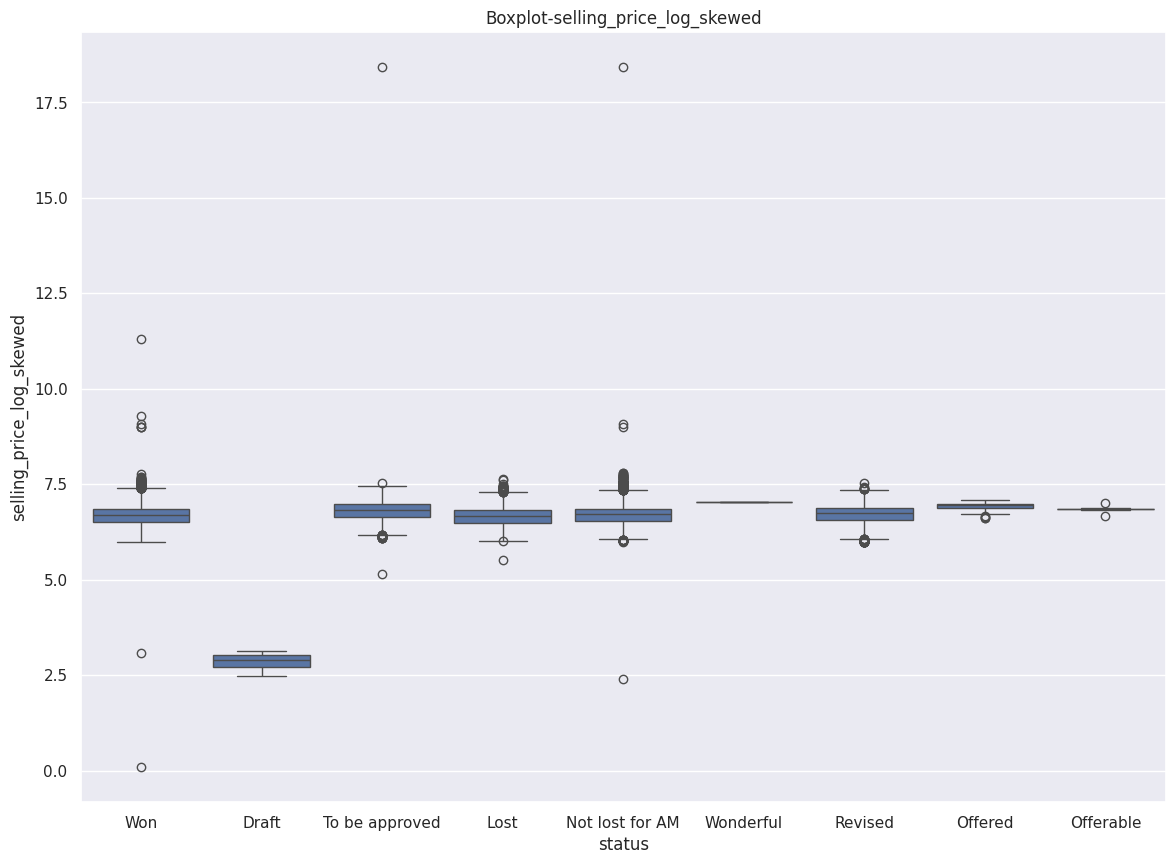

In [511]:
plt.figure(figsize=(14,10))
fig3=sns.boxplot(x="status",y="selling_price_log_skewed", data=df1)
plt.title('Boxplot-selling_price_log_skewed')
plt.show()


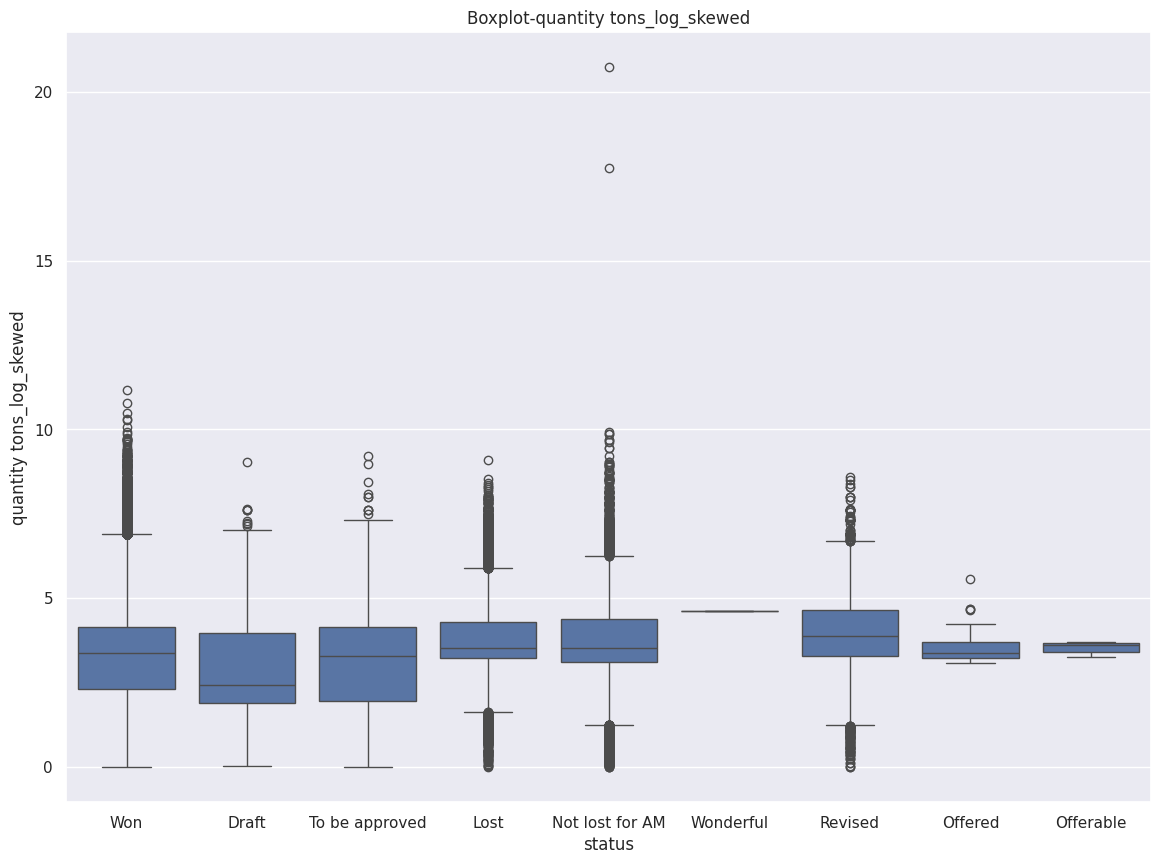

In [512]:
plt.figure(figsize=(14,10))
fig4=sns.boxplot(x="status",y="quantity tons_log_skewed", data=df1)
plt.title('Boxplot-quantity tons_log_skewed')
plt.show()


In [513]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
width,181673.0,1.297046e+03,2.489619e+02,700.000000,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
quantity tons_log_skewed,181673.0,3.474698e+00,1.329670e+00,0.000010,2.482543e+00,3.445693e+00,4.221864e+00,2.072327e+01
thickness_log_skewed,181673.0,1.056935e+00,6.012037e-01,0.165514,5.306283e-01,9.162907e-01,1.386294e+00,7.824446e+00
selling_price_log_skewed,181673.0,6.628216e+00,5.579402e-01,0.095310,6.507278e+00,6.700731e+00,6.860664e+00,1.842069e+01


In [514]:
#using IQR method to remove outliers
def outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    #lower threshold =5 and upper threshold = 20
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    df[column]=df[column].clip(lower_threshold,upper_threshold)


outlier(df1,'quantity tons_log_skewed')
outlier(df1,'width')
outlier(df1,'thickness_log_skewed')
outlier(df1,'selling_price_log_skewed')



In [515]:
def outliers(df):
   plt.figure(figsize=(18,18))

   plt.subplot(2,2,1)
   sns.boxplot(x='width', data=df1)
   plt.title('Boxplot-width')

   plt.subplot(2,2,2)
   sns.boxplot(x='thickness_log_skewed', data=df1)
   plt.title('Boxplot-thickness_log_skewed')

   plt.subplot(2,2,3)
   sns.boxplot(x='selling_price_log_skewed', data=df1)
   plt.title('Boxplot-selling_price_log_skewed')

   plt.subplot(2,2,4)
   sns.boxplot(x='quantity tons_log_skewed', data=df1)
   plt.title('Boxplot-quantity tons_log_skewed')

   plt.tight_layout()

   return plt.show()

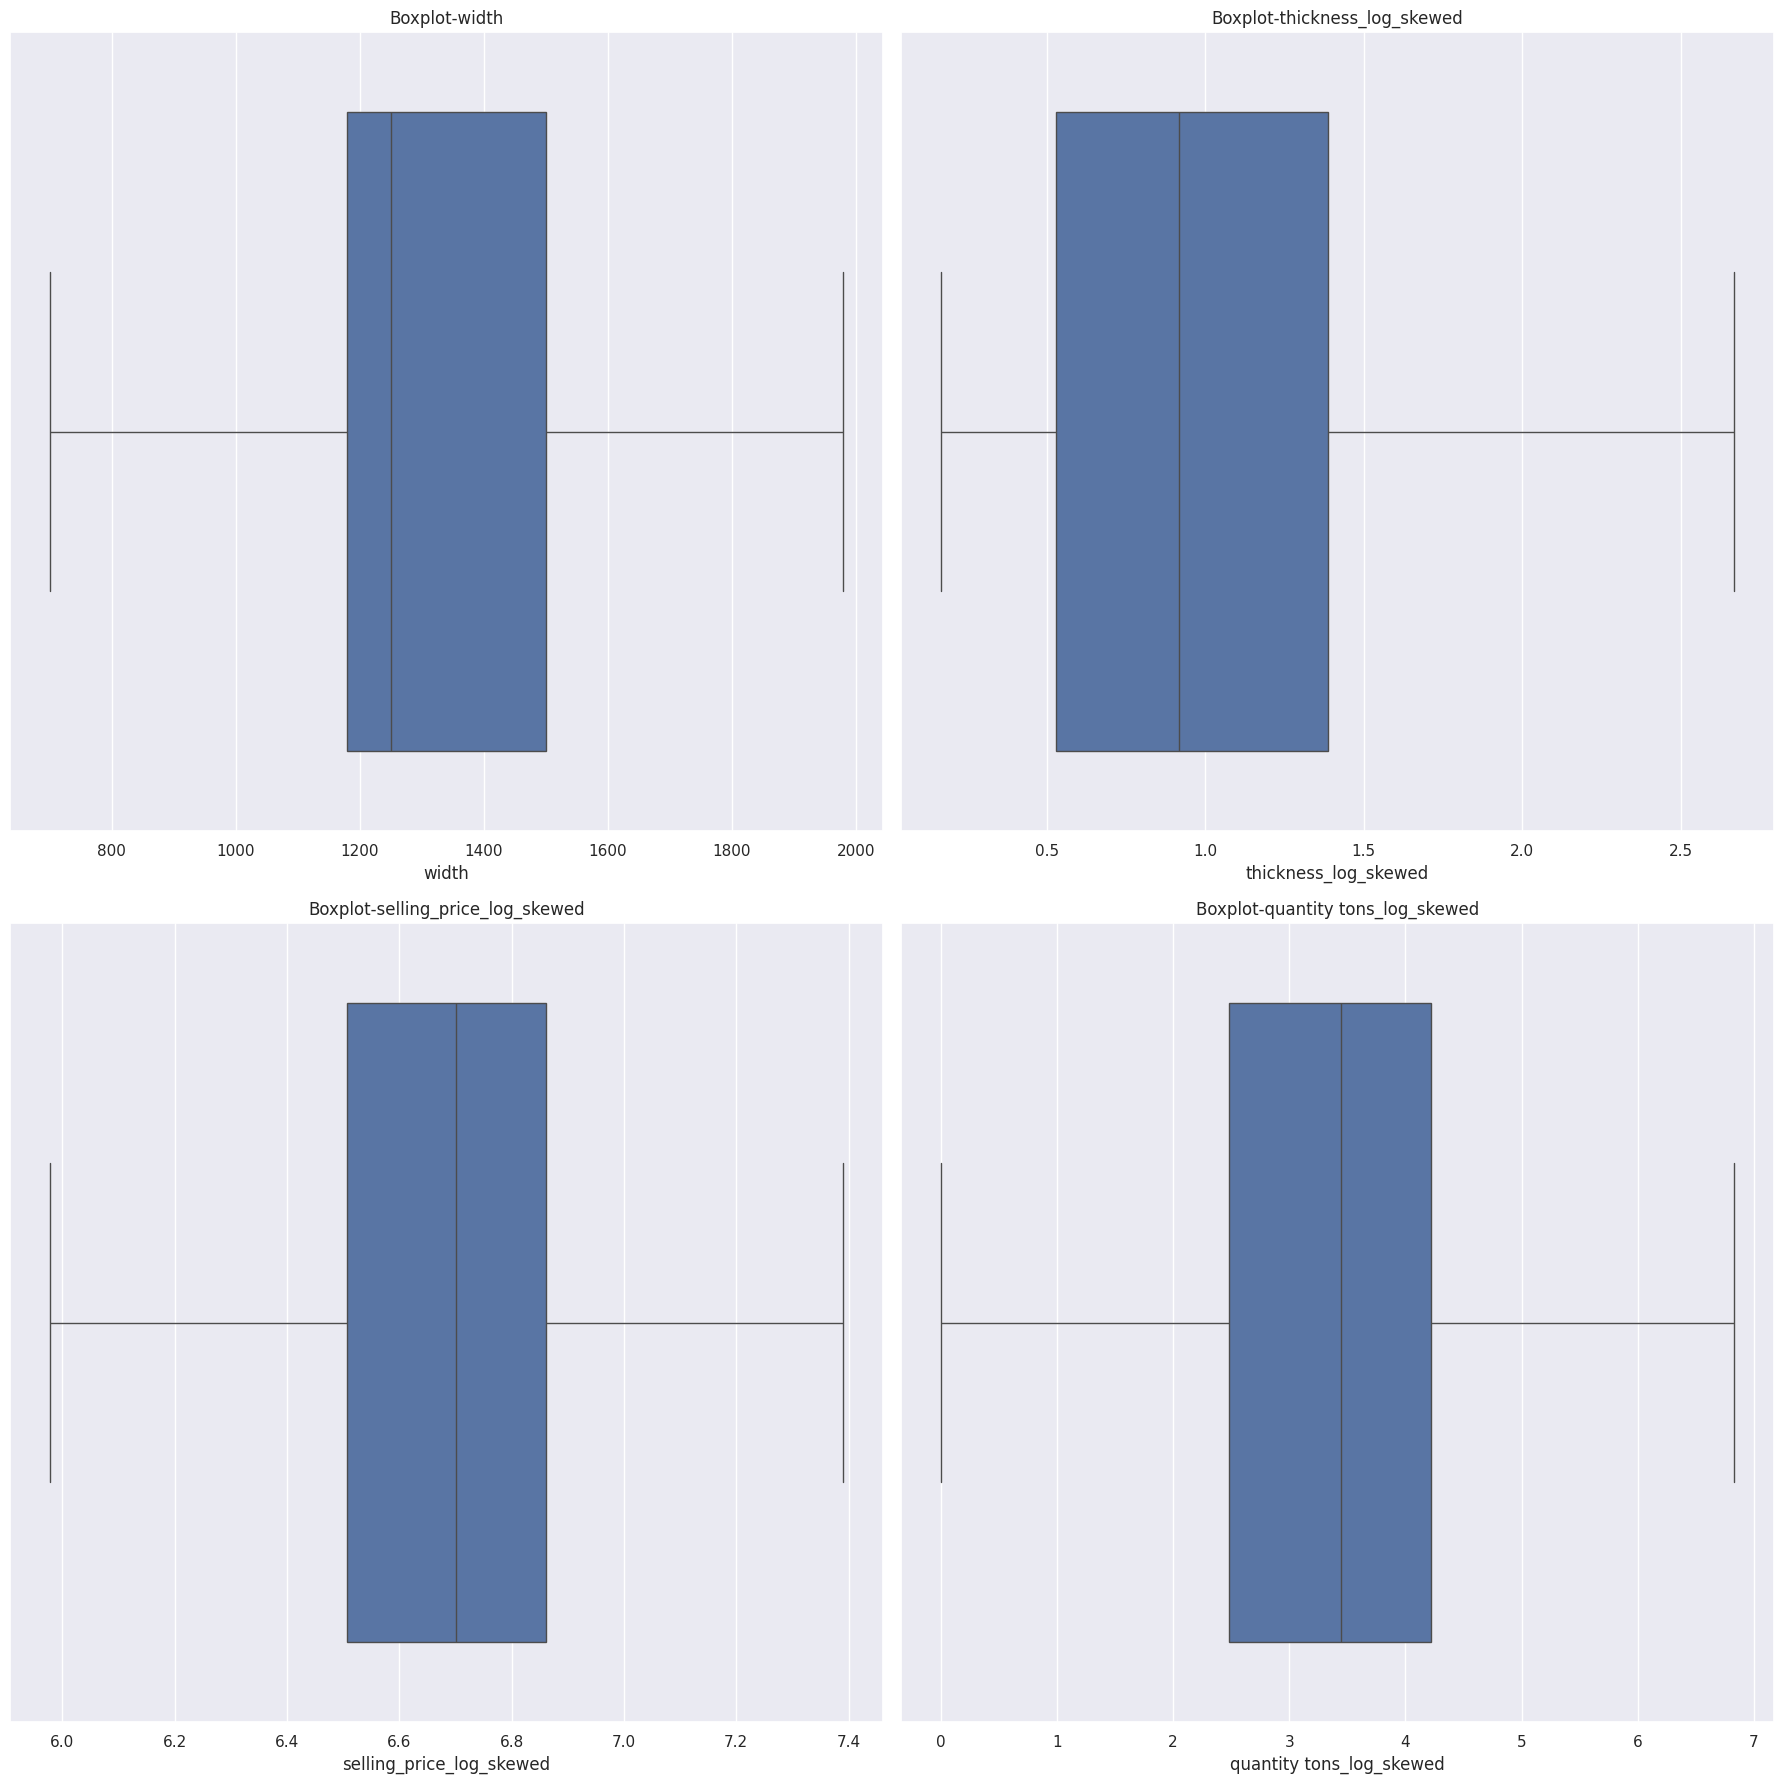

In [516]:
outliers(df1)

In [517]:
def outliers_with_target(df):
   plt.figure(figsize=(18,18))

   plt.subplot(2,2,1)
   sns.boxplot(x='status',y='width', data=df1)
   plt.title('Boxplot-width')

   plt.subplot(2,2,2)
   sns.boxplot(x='status',y='thickness_log_skewed', data=df1)
   plt.title('Boxplot-thickness_log_skewed')

   plt.subplot(2,2,3)
   sns.boxplot(x='status',y='selling_price_log_skewed', data=df1)
   plt.title('Boxplot-selling_price_log_skewed')

   plt.subplot(2,2,4)
   sns.boxplot(x='status',y='quantity tons_log_skewed', data=df1)
   plt.title('Boxplot-quantity tons_log_skewed')

   plt.tight_layout()

   return plt.show()

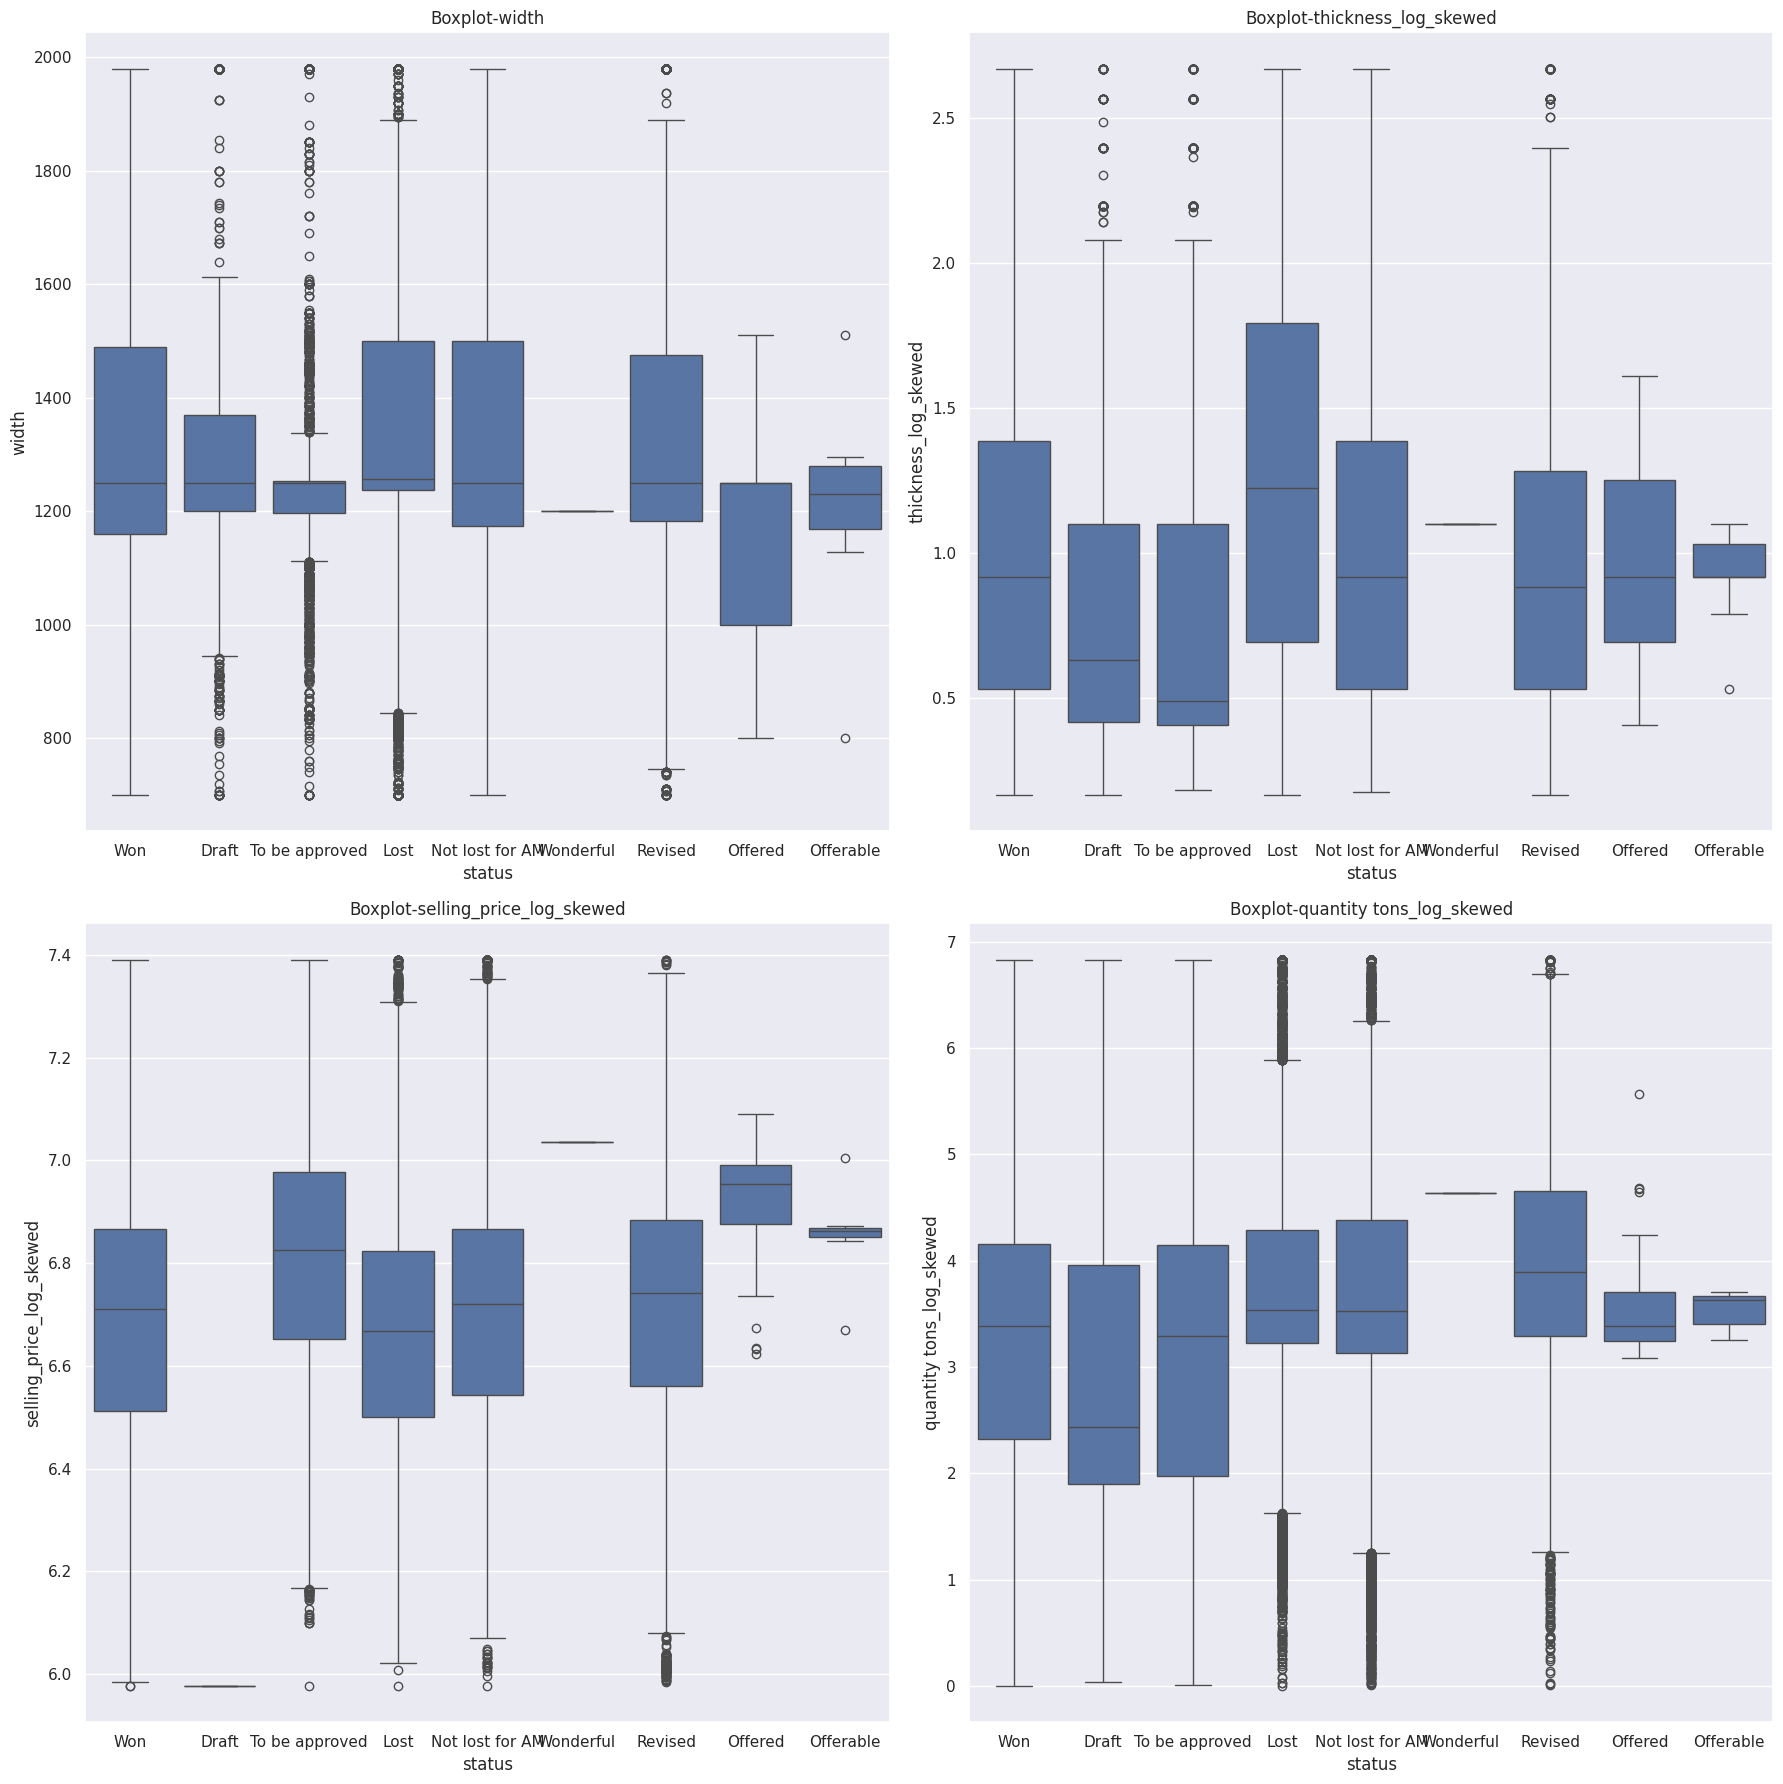

In [518]:
outliers_with_target(df1)

In [519]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
width,181673.0,1.297046e+03,2.489619e+02,700.000000,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
quantity tons_log_skewed,181673.0,3.465857e+00,1.302481e+00,0.000010,2.482543e+00,3.445693e+00,4.221864e+00,6.830844e+00
thickness_log_skewed,181673.0,1.054779e+00,5.947419e-01,0.165514,5.306283e-01,9.162907e-01,1.386294e+00,2.669794e+00
selling_price_log_skewed,181673.0,6.682075e+00,2.550538e-01,5.977199,6.507278e+00,6.700731e+00,6.860664e+00,7.390743e+00


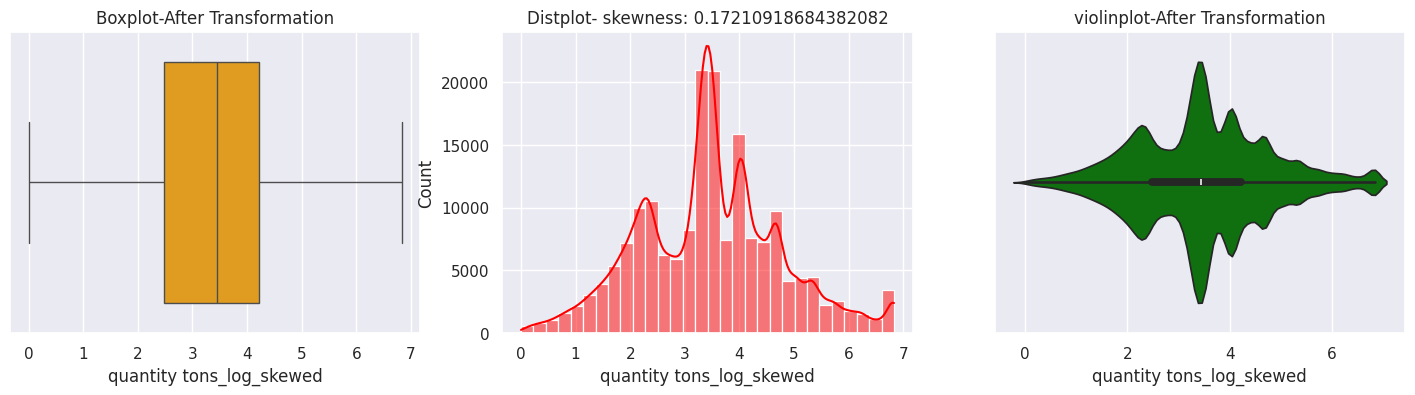

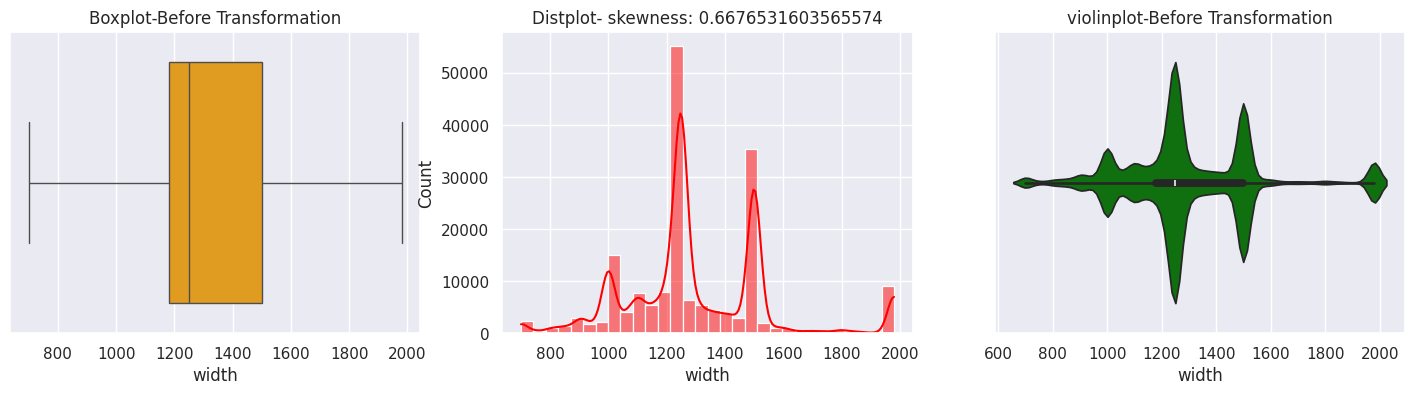

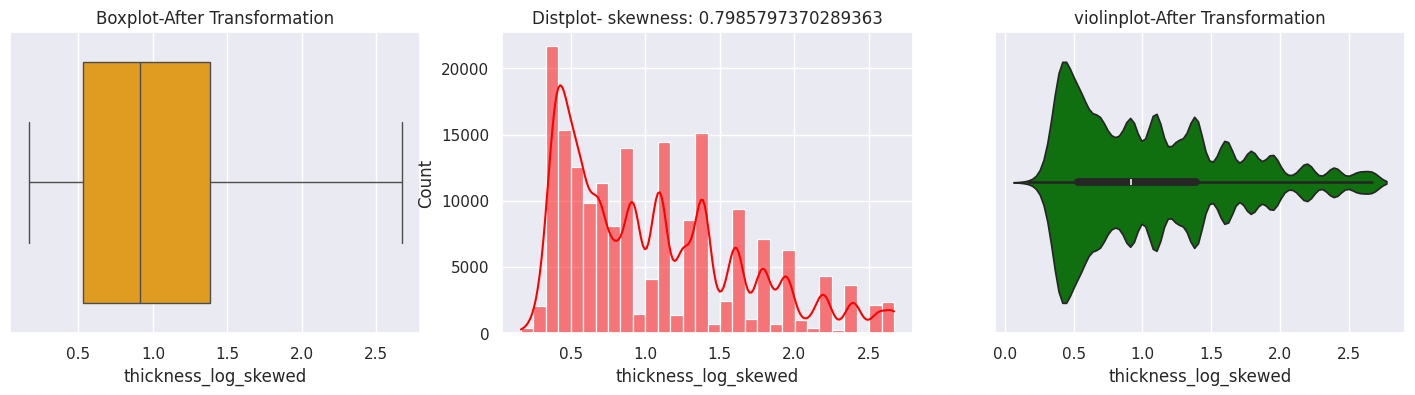

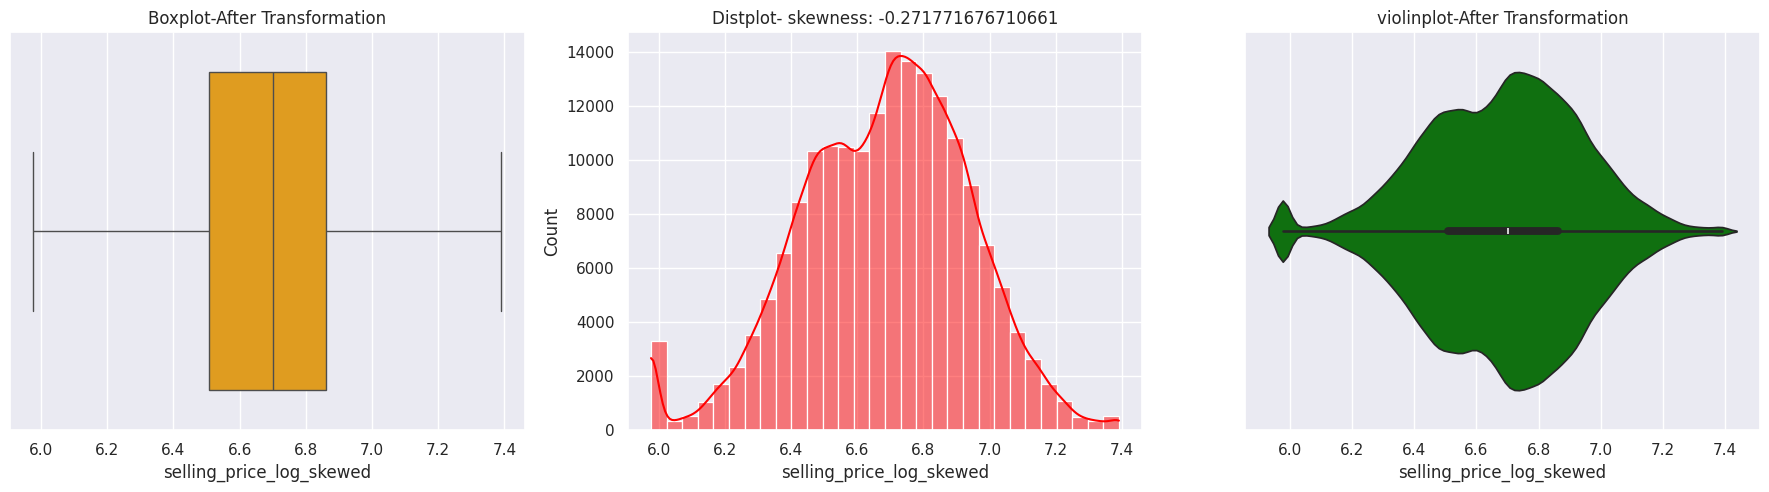

In [520]:
outlier_cols=['quantity tons_log_skewed','width','thickness_log_skewed','selling_price_log_skewed']
skewness(df1,*outlier_cols)

In [521]:
df1.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [522]:
#encode status
encoder=LabelEncoder()
df1['status']=encoder.fit_transform(df1['status'])

In [523]:
df1.status.unique()  #7- won , 1- lost

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

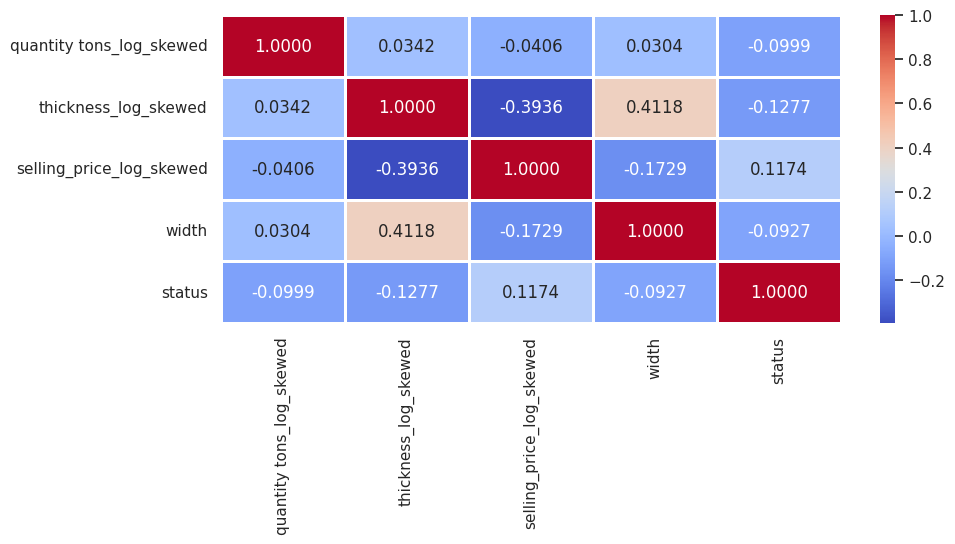

In [524]:
#correlation matrix
plt.figure(figsize=(10,4))
cols=['quantity tons_log_skewed','thickness_log_skewed','selling_price_log_skewed',"width","status"]
sns.heatmap(df1[cols].corr(),annot=True,fmt='.4f',linewidths=2,cmap='coolwarm')
plt.show()

In [525]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   item_date                 181673 non-null  object 
 1   customer                  181673 non-null  float64
 2   country                   181673 non-null  float64
 3   status                    181673 non-null  int64  
 4   item type                 181673 non-null  object 
 5   application               181673 non-null  float64
 6   width                     181673 non-null  float64
 7   product_ref               181673 non-null  int64  
 8   delivery date             181673 non-null  object 
 9   quantity tons_log_skewed  181673 non-null  float64
 10  thickness_log_skewed      181673 non-null  float64
 11  selling_price_log_skewed  181673 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 16.6+ MB


In [526]:
#finding the difference between delivery date and item order date

df1['difference_day']=(pd.to_datetime(df1['delivery date'])-pd.to_datetime(df1['item_date'])).dt.days

df1["item_date"] = pd.to_datetime(df1["item_date"], format="%Y/%m/%d")
df1["delivery date"] = pd.to_datetime(df1["delivery date"], format="%Y/%m/%d")

df1["item_date_day"] = df1["item_date"].dt.day
df1["item_date_month"] = df1["item_date"].dt.month
df1["item_date_year"] = df1["item_date"].dt.year

df1.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,7,W,10.0,1500.0,1670798778,2021-07-01,4.010077,1.098612,6.751101,91,1,4,2021
1,2021-04-01,30202938.0,25.0,7,W,41.0,1210.0,1668701718,2021-04-01,6.645123,0.587787,6.954639,0,1,4,2021
2,2021-04-01,30153963.0,30.0,7,WI,28.0,952.0,628377,2021-01-01,5.958755,0.322083,6.469762,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,7,S,59.0,1317.0,1668701718,2021-01-01,5.315229,1.193922,6.645091,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,7,W,10.0,1980.0,640665,2021-03-01,6.667626,1.609438,6.359574,-31,1,4,2021


In [527]:
#splitting the negative difference day and positive difference day in separate dataframe
positive_delivery_df=df1[df1['difference_day']>0]
negative_delivery_df=df1[df1['difference_day']<0]

print(positive_delivery_df.shape)
print(negative_delivery_df.shape)

(165105, 16)
(16108, 16)


In [528]:
positive_delivery_df.head(5)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,7,W,10.0,1500.0,1670798778,2021-07-01,4.010077,1.098612,6.751101,91,1,4,2021
6,2021-04-01,30209509.0,30.0,0,W,41.0,1125.0,611993,2021-07-01,1.509090,0.322083,5.977199,91,1,4,2021
8,2021-04-01,30341428.0,38.0,7,S,10.0,1275.0,1668701376,2021-07-01,4.249521,0.470004,7.218177,91,1,4,2021
10,2021-04-01,30209509.0,30.0,0,W,41.0,1125.0,611993,2021-07-01,2.320009,0.322083,5.977199,91,1,4,2021
12,2021-04-01,30165529.0,78.0,7,W,10.0,1250.0,164141591,2021-07-01,3.350344,0.559616,7.002156,91,1,4,2021


In [529]:
negative_delivery_df.head(5)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,30153963.0,30.0,7,WI,28.0,952.0,628377,2021-01-01,5.958755,0.322083,6.469762,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,7,S,59.0,1317.0,1668701718,2021-01-01,5.315229,1.193922,6.645091,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,7,W,10.0,1980.0,640665,2021-03-01,6.667626,1.609438,6.359574,-31,1,4,2021
7,2021-04-01,30342192.0,32.0,7,W,41.0,1220.0,611993,2021-01-01,4.739589,0.518794,6.837333,-90,1,4,2021
11,2021-04-01,30342192.0,32.0,7,W,41.0,1220.0,611993,2021-01-01,4.744894,0.438255,6.861711,-90,1,4,2021


## *`MACHINE LEARNING`*

In [530]:
#predicting the delivery date using regressor models

pos_df=positive_delivery_df.copy()
neg_df=negative_delivery_df.copy()


In [531]:
pos_df.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date',
       'quantity tons_log_skewed', 'thickness_log_skewed',
       'selling_price_log_skewed', 'difference_day', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [532]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [533]:
#finding the best model using the model
class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaBoostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'accuracy': model.score(self.x_test, self.y_test),
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred):.4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred):.4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred):.4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def best_model(self):
        reults=[self.evaluate_model(name, model) for name, model in self.models.items()]
        self.best_model_score= pd.DataFrame(reults)
        return self.best_model_score

In [534]:
#encoding the categorical columns
encoder=OrdinalEncoder()
cols=['item type','item_date','delivery date']
for col in cols:
   pos_df[col]=encoder.fit_transform(pos_df[[col]])
   neg_df[col]=encoder.fit_transform(neg_df[[col]])


In [535]:
#splitting data into dependent and independent variables
x=pos_df.drop(['delivery date','item_date','difference_day','width'],axis=1)
y=pos_df['difference_day']

In [536]:
#train using regressor models
models=Regression(x,y)
models.best_model()

,Model_Name,accuracy,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,0.117005,1.3554e+03,1.3509e+03,31.1172,30.9878,1.1746e-01,0.1170
1,RandomForestRegressor,0.944268,1.1807e+01,8.5263e+01,1.2800,3.4347,9.9231e-01,0.9443
2,ExtraTreesRegressor,0.959438,0.0000e+00,6.2054e+01,0.0000,2.4705,1.0000e+00,0.9594
3,GradientBoostingRegressor,0.546952,6.8416e+02,6.9311e+02,20.4433,20.5039,5.5453e-01,0.5470
4,DecisionTreeRegressor,0.895236,0.0000e+00,1.6028e+02,0.0000,3.0925,1.0000e+00,0.8952
5,XGBRegressor,0.826172,2.3646e+02,2.6594e+02,10.6025,11.1432,8.4604e-01,0.8262


In [537]:
def train_and_evaluate(x, y, inconsistent_data):
    # Split the original dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate mean square errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Train_accuracy: {round(model.score(x_train, y_train), 4)}')
    print(f'\nTest_accuracy: {round(model.score(x_test, y_test), 4)}')

    print(f'\nTrain_Mean_Square_Error: {round(mse_train, 4)}')
    print(f'\nTest_Mean_Square_Error: {round(mse_test, 4)}')

    # Extract features for inconsistent delivery date data
    y_new = neg_df['difference_day']
    x_new = neg_df.drop(['delivery date','item_date','difference_day','width'], axis=1)

    # Predict day_difference for inconsistent delivery dates
    day_pred = model.predict(x_new)

    return day_pred

In [538]:
day_pred = train_and_evaluate(x, y, neg_df)

Train_accuracy: 0.9924

Test_accuracy: 0.9435

Train_Mean_Square_Error: 11.7211

Test_Mean_Square_Error: 86.4148


In [ ]:
#update difference_day column in negative_delivery_df
negative_delivery_df['difference_day'] = day_pred
negative_delivery_df.head()

In [ ]:
# Update  'delivery_date' with the help of 'difference_day' in the original DataFrame

negative_delivery_df['delivery date'] = negative_delivery_df.apply(
    lambda row: row['item_date'] + pd.to_timedelta(row['difference_day'], unit='D'),
    axis=1
)

negative_delivery_df.head()

In [541]:
negative_delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16108 entries, 2 to 181672
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   item_date                 16108 non-null  datetime64[ns]
 1   customer                  16108 non-null  float64       
 2   country                   16108 non-null  float64       
 3   status                    16108 non-null  int64         
 4   item type                 16108 non-null  object        
 5   application               16108 non-null  float64       
 6   width                     16108 non-null  float64       
 7   product_ref               16108 non-null  int64         
 8   delivery date             16108 non-null  datetime64[ns]
 9   quantity tons_log_skewed  16108 non-null  float64       
 10  thickness_log_skewed      16108 non-null  float64       
 11  selling_price_log_skewed  16108 non-null  float64       
 12  difference_day        

In [542]:
negative_delivery_df['item_date'] = pd.to_datetime(negative_delivery_df['item_date'])

# Update 'delivery date' using apply and a lambda function
negative_delivery_df['delivery date'] = negative_delivery_df.apply(
    lambda row: (row['item_date'] + pd.to_timedelta(row['difference_day'], unit='D')).strftime("%Y-%m-%d"),
    axis=1
)
negative_delivery_df.head()

<ipython-input-542-92715798050c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_delivery_df['item_date'] = pd.to_datetime(negative_delivery_df['item_date'])
<ipython-input-542-92715798050c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_delivery_df['delivery date'] = negative_delivery_df.apply(


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,30153963.0,30.0,7,WI,28.0,952.0,628377,2021-06-17,5.958755,0.322083,6.469762,77.29,1,4,2021
3,2021-04-01,30349574.0,32.0,7,S,59.0,1317.0,1668701718,2021-08-09,5.315229,1.193922,6.645091,130.24,1,4,2021
4,2021-04-01,30211560.0,28.0,7,W,10.0,1980.0,640665,2021-07-06,6.667626,1.609438,6.359574,96.10,1,4,2021
7,2021-04-01,30342192.0,32.0,7,W,41.0,1220.0,611993,2021-08-05,4.739589,0.518794,6.837333,126.56,1,4,2021
11,2021-04-01,30342192.0,32.0,7,W,41.0,1220.0,611993,2021-08-05,4.744894,0.438255,6.861711,126.57,1,4,2021


In [543]:
final_copper_df = pd.concat([positive_delivery_df, negative_delivery_df],  axis=0, ignore_index=True)

# Extract day, month, and year components from 'delivery date'

final_copper_df['delivery date'] = pd.to_datetime(final_copper_df['delivery date'])
final_copper_df['delivery_date_day'] = final_copper_df['delivery date'].dt.day
final_copper_df['delivery_date_month'] = final_copper_df['delivery date'].dt.month
final_copper_df['delivery_date_year'] = final_copper_df['delivery date'].dt.year
final_copper_df.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,2021-04-01,30156308.0,28.0,7,W,10.0,1500.0,1670798778,2021-07-01,4.010077,1.098612,6.751101,91.0,1,4,2021,1,7,2021
1,2021-04-01,30209509.0,30.0,0,W,41.0,1125.0,611993,2021-07-01,1.509090,0.322083,5.977199,91.0,1,4,2021,1,7,2021
2,2021-04-01,30341428.0,38.0,7,S,10.0,1275.0,1668701376,2021-07-01,4.249521,0.470004,7.218177,91.0,1,4,2021,1,7,2021
3,2021-04-01,30209509.0,30.0,0,W,41.0,1125.0,611993,2021-07-01,2.320009,0.322083,5.977199,91.0,1,4,2021,1,7,2021
4,2021-04-01,30165529.0,78.0,7,W,10.0,1250.0,164141591,2021-07-01,3.350344,0.559616,7.002156,91.0,1,4,2021,1,7,2021


In [544]:

# Drop 'item_date' and 'delivery date' columns
final_copper_df.drop(['item_date', 'delivery date'], axis =1, inplace = True )
final_copper_df

,customer,country,status,item type,application,width,product_ref,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,7,W,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
1,30209509.0,30.0,0,W,41.0,1125.0,611993,1.509090,0.322083,5.977199,91.00,1,4,2021,1,7,2021
2,30341428.0,38.0,7,S,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
3,30209509.0,30.0,0,W,41.0,1125.0,611993,2.320009,0.322083,5.977199,91.00,1,4,2021,1,7,2021
4,30165529.0,78.0,7,W,10.0,1250.0,164141591,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181208,30200854.0,25.0,7,W,41.0,1220.0,164141591,4.639402,0.672944,6.383507,49.41,2,7,2020,20,8,2020
181209,30200854.0,25.0,7,W,41.0,1500.0,164141591,5.342748,0.667829,6.380123,48.82,2,7,2020,19,8,2020
181210,30200854.0,25.0,7,W,41.0,1250.0,164141591,1.655480,0.536493,6.429719,43.65,2,7,2020,14,8,2020
181211,30200854.0,25.0,7,W,41.0,1250.0,164141591,3.445693,0.615186,6.400257,46.30,2,7,2020,17,8,2020


In [545]:
final_copper_df.to_csv('final_copper_df.csv', index = False)

## *`CLASIIFIER MODEL`*

In [546]:
final_copper_df

,customer,country,status,item type,application,width,product_ref,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,7,W,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
1,30209509.0,30.0,0,W,41.0,1125.0,611993,1.509090,0.322083,5.977199,91.00,1,4,2021,1,7,2021
2,30341428.0,38.0,7,S,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
3,30209509.0,30.0,0,W,41.0,1125.0,611993,2.320009,0.322083,5.977199,91.00,1,4,2021,1,7,2021
4,30165529.0,78.0,7,W,10.0,1250.0,164141591,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181208,30200854.0,25.0,7,W,41.0,1220.0,164141591,4.639402,0.672944,6.383507,49.41,2,7,2020,20,8,2020
181209,30200854.0,25.0,7,W,41.0,1500.0,164141591,5.342748,0.667829,6.380123,48.82,2,7,2020,19,8,2020
181210,30200854.0,25.0,7,W,41.0,1250.0,164141591,1.655480,0.536493,6.429719,43.65,2,7,2020,14,8,2020
181211,30200854.0,25.0,7,W,41.0,1250.0,164141591,3.445693,0.615186,6.400257,46.30,2,7,2020,17,8,2020


In [547]:
final_copper_df.status.unique()

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

In [548]:
#filtering data where status is won and lost

final_copper_df = final_copper_df[final_copper_df['status'].isin([7,1])]
final_copper_df

,customer,country,status,item type,application,width,product_ref,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,7,W,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,91.00,1,4,2021,1,7,2021
2,30341428.0,38.0,7,S,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,91.00,1,4,2021,1,7,2021
4,30165529.0,78.0,7,W,10.0,1250.0,164141591,3.350344,0.559616,7.002156,91.00,1,4,2021,1,7,2021
5,30202362.0,27.0,7,S,10.0,1010.0,628377,3.503613,0.470004,6.881411,91.00,1,4,2021,1,7,2021
7,30211222.0,30.0,7,W,10.0,900.0,611993,3.082236,0.371564,7.182496,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181208,30200854.0,25.0,7,W,41.0,1220.0,164141591,4.639402,0.672944,6.383507,49.41,2,7,2020,20,8,2020
181209,30200854.0,25.0,7,W,41.0,1500.0,164141591,5.342748,0.667829,6.380123,48.82,2,7,2020,19,8,2020
181210,30200854.0,25.0,7,W,41.0,1250.0,164141591,1.655480,0.536493,6.429719,43.65,2,7,2020,14,8,2020
181211,30200854.0,25.0,7,W,41.0,1250.0,164141591,3.445693,0.615186,6.400257,46.30,2,7,2020,17,8,2020


In [549]:
final_copper_df.to_csv('final_copper_filtered_df.csv')

In [550]:
columns=['status','item type']
for col in columns:
  print(final_copper_df[col].unique())
  print(final_copper_df[col].value_counts())

  print('-'*10)

[7 1]
status
7    115615
1     34416
Name: count, dtype: int64
----------
['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']
item type
W         91707
S         52376
PL         4954
WI          503
Others      463
IPL          27
SLAWR         1
Name: count, dtype: int64
----------
[7 1]
status
7    115615
1     34416
Name: count, dtype: int64
----------
['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']
item type
W         91707
S         52376
PL         4954
WI          503
Others      463
IPL          27
SLAWR         1
Name: count, dtype: int64
----------


In [551]:
#encode item type
encoder=OrdinalEncoder()
final_copper_df["item type"]=encoder.fit_transform(final_copper_df[["item type"]])

#encode status
final_copper_df["status"]=final_copper_df["status"].replace({7:1,1:0})

<ipython-input-551-cc24c4664710>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_copper_df["item type"]=encoder.fit_transform(final_copper_df[["item type"]])
<ipython-input-551-cc24c4664710>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_copper_df["status"]=final_copper_df["status"].replace({7:1,1:0})


In [552]:
for col in columns:
  print(final_copper_df[col].unique())

[1 0]
[5. 3. 1. 2. 6. 0. 4.]


In [ ]:
'''
win=1
lost=0

item type
W=5.0
S=3.0
others=1.0
PL=2.0
WI=6.0
IPL=4.0

'''

'\nwin=1\nlost=0\n\nitem type\nW=5.0\nS=3.0\nothers=1.0\nPL=2.0\nWI=6.0\nIPL=4.0\n\n'

In [553]:
final= final_copper_df.copy()

In [554]:
final.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,4.010077,1.098612,6.751101,91.0,1,4,2021,1,7,2021
2,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.249521,0.470004,7.218177,91.0,1,4,2021,1,7,2021
4,30165529.0,78.0,1,5.0,10.0,1250.0,164141591,3.350344,0.559616,7.002156,91.0,1,4,2021,1,7,2021
5,30202362.0,27.0,1,3.0,10.0,1010.0,628377,3.503613,0.470004,6.881411,91.0,1,4,2021,1,7,2021
7,30211222.0,30.0,1,5.0,10.0,900.0,611993,3.082236,0.371564,7.182496,91.0,1,4,2021,1,7,2021


<ipython-input-556-fe581ce911c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="status", data=final, palette=colors)


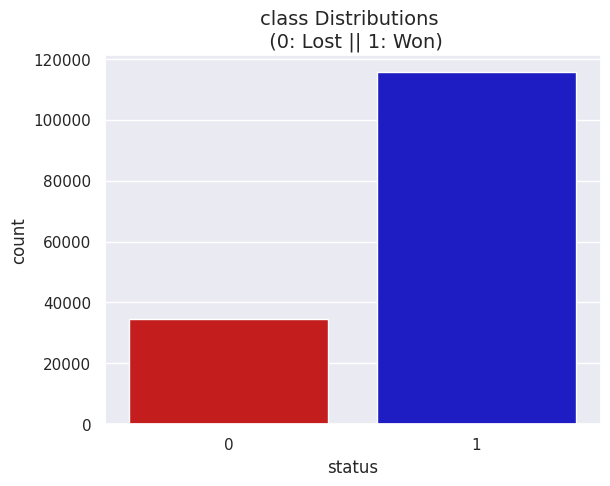

In [556]:
colors= ["#DF0101","#0101DF"]
sns.countplot(x="status", data=final, palette=colors)
plt.title('class Distributions \n (0: Lost || 1: Won)', fontsize=14)
plt.show()

In [557]:
#the class is imbalanced , so we need to balance it using oversampling technique
x=final.drop(['status',"width"],axis=1)
y=final['status']
import imblearn
from imblearn.combine import SMOTETomek
model= SMOTETomek()
x_resampled, y_resampled = model.fit_resample(x, y)
x_resampled.shape, y_resampled.shape


((230174, 15), (230174,))

In [469]:
x.columns

Index(['customer', 'country', 'item type', 'application', 'product_ref',
       'quantity tons_log_skewed', 'thickness_log_skewed',
       'selling_price_log_skewed', 'difference_day', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [558]:
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [559]:
#finding the best model using the model
class classifier():

    def __init__(self, x, y):
        self.models = {
            'LogisticRegression': LogisticRegression(),
            'AdaBoostClassifier': AdaBoostClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'ExtraTreesClassifier': ExtraTreesClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'XGBClassifier': XGBClassifier()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_accuracy': model.score(self.x_train, self.y_train),
            'Test_accuracy': model.score(self.x_test, self.y_test),
            'Train_precision': precision_score(self.y_train, y_train_pred),
            'Test_precision': precision_score(self.y_test, y_test_pred),
            'Train_recall': recall_score(self.y_train, y_train_pred),
            'Test_recall': recall_score(self.y_test, y_test_pred),
            'Train_f1': f1_score(self.y_train, y_train_pred),
            'Test_f1': f1_score(self.y_test, y_test_pred)
           }
        return result

    def best_model(self):
        reults=[self.evaluate_model(name, model) for name, model in self.models.items()]
        self.best_model_score= pd.DataFrame(reults)
        return self.best_model_score

In [560]:
#train and find best classifier models
models=classifier(x_resampled,y_resampled)
models.best_model()

,Model_Name,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1
0,LogisticRegression,0.542427,0.542717,0.530971,0.526876,0.746126,0.750713,0.620425,0.619186
1,AdaBoostClassifier,0.782192,0.782079,0.791959,0.786018,0.766876,0.769399,0.779216,0.777620
2,RandomForestClassifier,0.999995,0.986923,1.000000,0.991932,0.999989,0.981577,0.999995,0.986727
3,ExtraTreesClassifier,1.000000,0.988335,1.000000,0.992217,1.000000,0.984165,1.000000,0.988174
4,GradientBoostingClassifier,0.821119,0.821180,0.836476,0.831369,0.799361,0.801465,0.817497,0.816143
5,DecisionTreeClassifier,1.000000,0.971391,1.000000,0.971756,1.000000,0.970435,1.000000,0.971095
6,XGBClassifier,0.957315,0.951016,0.974859,0.969639,0.939051,0.930210,0.956620,0.949515


In [ ]:
'''
as we see, ExtraTreesClassifier, RandomForestClassifier and DecisionTreeClassifier is the best model which have good testing accuracy but overfitted train accuracy
i am using RandomForestClassifier
'''

'\nas we see, ExtraTreesClassifier, RandomForestClassifier and DecisionTreeClassifier is the best model which have good testing accuracy but overfitted train accuracy\ni am using RandomForestClassifier\n'

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.


In [561]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
parameters= {"max_depth": [2,5,10,20],
             "max_features": [ 'sqrt', 'log2',None],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 2, 4],
             "bootstrap": [True, False]}

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
gridsearch= GridSearchCV(clf, parameters)
gridsearch.fit(x_train, y_train)

KeyboardInterrupt: 